In [1]:
import pandas as pd

X_scaled = pd.read_csv("C:\\Users\\User\\.vscode\\APP USER BEHAVIOR SEGMENTATION SYSTEM\\data\\scaled_features.csv")

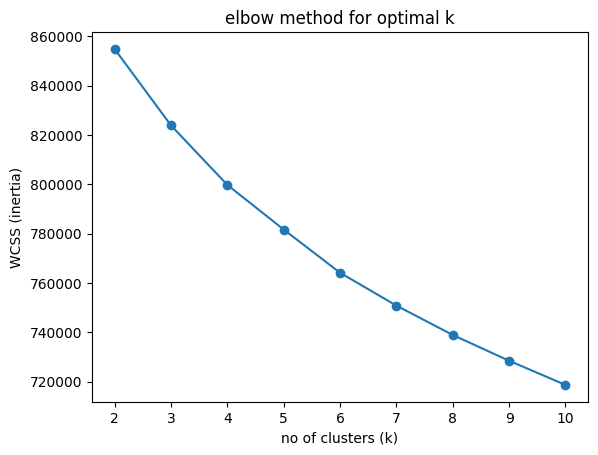

In [2]:
# elbow method to determine k

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

wcss = []
k_range = range(2,11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# plot the elbow curve

plt.figure()
plt.plot(k_range, wcss, marker= 'o', linestyle='-')
plt.title("elbow method for optimal k")
plt.xlabel("no of clusters (k)")
plt.ylabel("WCSS (inertia)")  
plt.grid = True  
plt.show()



In [3]:
# Clustering model selection 
# 1. kmeans clustering

from sklearn.metrics import silhouette_score
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    kmeans_score = silhouette_score(X_scaled, labels)
    print(f"K = {k}, Silhouette Score = {kmeans_score:.3f}")

K = 2, Silhouette Score = 0.087
K = 3, Silhouette Score = 0.047
K = 4, Silhouette Score = 0.043
K = 5, Silhouette Score = 0.042
K = 6, Silhouette Score = 0.042
K = 7, Silhouette Score = 0.044


In [4]:
# 2. Hierarchical clustering (agglomerative clustering)

from sklearn.cluster import AgglomerativeClustering
from sklearn.utils import resample
k=4
X_sample = resample(X_scaled, n_samples=5000, random_state=42)

agg = AgglomerativeClustering(n_clusters=k, linkage = 'ward')
agg_labels = agg.fit_predict(X_sample)

agg_score = silhouette_score(X_sample, agg_labels)
print(agg_score)


0.02929784231912097


In [5]:
# 3. DBSCAN 

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2.0, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Remove noise points (-1)
mask = dbscan_labels != -1

if len(set(dbscan_labels[mask])) > 1:
    dbscan_score = silhouette_score(X_scaled[mask], dbscan_labels[mask])
else:
    dbscan_score = -1

print(dbscan_score)

-0.05589992707868472


In [6]:
# 4. Mini Batch Kmeans
from sklearn.cluster import MiniBatchKMeans

mini_batch_kmeans = MiniBatchKMeans(n_clusters=4, random_state=42)
labels = mini_batch_kmeans.fit_predict(X_scaled)

mini_batch_kmeans_score = silhouette_score(X_scaled, labels)
print(mini_batch_kmeans_score)

0.03769306726167148


INSIGHT : Having applied various clustering algorithms, with k = 4 value, the silhouette score is high while performing KMEANS algorithm. (note: for k = 2, the silhouette score is high compared to k = 3 and 4, but for better cluster interpretation, 4 has been chosen as k value.)

In [7]:
# comparison table of all clustering algorithms

comparison_table = pd. DataFrame({
    "Algorithm" : ["KMeans", "Hierarchical", "DBSCAN", "MiniBatchKMeans"],
    "Silhouette_Score" : [kmeans_score, agg_score, dbscan_score, mini_batch_kmeans_score]
    })

print(comparison_table)

         Algorithm  Silhouette_Score
0           KMeans          0.043561
1     Hierarchical          0.029298
2           DBSCAN         -0.055900
3  MiniBatchKMeans          0.037693


In [8]:
comparison_table.to_csv("C:\\Users\\User\\.vscode\\APP USER BEHAVIOR SEGMENTATION SYSTEM\\outputs\\comparison_table.csv", index = False)